<a href="https://colab.research.google.com/github/SebasM2000/DataBase_Sttcs/blob/main/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount = True)
#%cd /content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs

#! git pull

In [22]:
# Librerías
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Autosaving every 60 seconds


> **Nota:** En este trabajo, se eligieron las primeras 31 columnas (que se exponen en las siguiente celda) para facilitar el análisis de nuestra base de datos. Además, consideramos que las variables elegidas son las más relevantes para nuestro estudio.

In [23]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")

# Desplegando columnas de las que se escogerán para el modelo
datos.columns[:31]

C:\Users\s\AppData\Local\Temp\ipykernel_9916\818878688.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

> <h2> Primer paso: selección y explicación de variables </h2>
>
> Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:
>
> - **patient_id:** Es la identificación única de cada paciente
> - **type_of_breast_surgery:** Expone el tipo de cirugía a la que fue sometida cada paciente.
> - **cancer_type_detailed:** Contiene la información específica del tipo de cáncer detectado.
> - **cellularity:** Describe las celulas cancerosas que se detectan en el tumor.
> - **neoplasm_histologic_grade:** Describe el aspecto de las células cancerosas en comparación con las células sana de 1 a 3.
> - **lymph_nodes_examined_positive:** Describe cuantos ganglios linfáticos han detectado células cancerosas.
> - **nottingham_prognostic_index:** Evalua el grado de deformacion de las celulas de 1 a 9.
> - **overall_survival_months:** Determina cuantos meses quedan de vida en los pacientes.
> - **tumor_stage:** Describe cuanto cancer hay en el cuerpo clasificando en etapas de 1 a 4.
> - **death_from_cancer:** Pacientes que murieron por cancer o por otras circunstancias.
>
> Esta información es proporcionada por Breastcancer.org.
Donar para apoyar recursos gratuitos y programación para las personas afectadas por cáncer de mama: https://give.breastcancer.org/give/297660/#!/donation/checkout?c_src=clipboard&c_src2=text-link

In [48]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns=["patient_id","type_of_breast_surgery", 
                                      "cancer_type_detailed", "cellularity","neoplasm_histologic_grade",
                                      "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                                      "overall_survival", "hormone_therapy","death_from_cancer"])
analisis.head()

,patient_id,type_of_breast_surgery,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival,hormone_therapy,death_from_cancer
0,0,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,1,1,Living
1,2,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,1,1,Living
2,5,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,0,1,Died of Disease
3,6,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,1,1,Living
4,8,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,0,1,Died of Disease


In [42]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   type_of_breast_surgery         1882 non-null   object 
 2   cancer_type_detailed           1889 non-null   object 
 3   cellularity                    1850 non-null   object 
 4   neoplasm_histologic_grade      1832 non-null   float64
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   overall_survival_months        1904 non-null   float64
 8   tumor_stage                    1403 non-null   float64
 9   death_from_cancer              1903 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 148.9+ KB


patient_id                         0
type_of_breast_surgery            22
cancer_type_detailed              15
cellularity                       54
neoplasm_histologic_grade         72
lymph_nodes_examined_positive      0
nottingham_prognostic_index        0
overall_survival_months            0
tumor_stage                      501
death_from_cancer                  1
dtype: int64

> <h2> Segundo paso </h2>
>
> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.
>
> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores **NO** nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.

In [49]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1 = limpieza_1.drop_duplicates(["patient_id"])
limpieza_1

# Nota: Prestar atención a cualquier columna que:
# Esté mal formateada,
# Requiere más datos o mucho procesamiento para convertirse en una característica útil
# Contiene información redundante

,patient_id,type_of_breast_surgery,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival,hormone_therapy,death_from_cancer
0,0,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,1,1,Living
1,2,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,1,1,Living
2,5,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,0,1,Died of Disease
3,6,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,1,1,Living
4,8,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,0,1,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1899,7295,BREAST CONSERVING,Breast Invasive Lobular Carcinoma,High,3.0,1.0,5.050,1,1,Living
1900,7296,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,3.0,1.0,5.040,0,0,Died of Disease
1901,7297,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,3.0,45.0,6.050,0,1,Died of Disease
1902,7298,MASTECTOMY,Breast Invasive Ductal Carcinoma,Moderate,2.0,12.0,5.050,0,1,Died of Other Causes


> <h2> Propuesta de ecuación </h2>
>
> En nuestro análisis, decidimos predecir **el grado histológico del neplasma (neoplasm_histologic_grade)**. Inicialmente, tenemos 4 variables categoricas, ya que con ellas solo obtenemos información cualitativa; por lo tanto, se las convierte
en variables numéricas para que el algoritmo sea capaz de reconocerlas. Para ello, se utilizará un sistema de codificacion 
dummy para las siguientes variables:
>
> - type_of_breast_surgery[T.MASTECTOMY]                                
> - cancer_type_detailed[T.Breast Invasive Ductal Carcinoma]            
> - cancer_type_detailed[T.Breast Invasive Lobular Carcinoma]           
> - cancer_type_detailed[T.Breast Invasive Mixed Mucinous Carcinoma]    
> - cancer_type_detailed[T.Breast Mixed Ductal and Lobular Carcinoma]   
> - cancer_type_detailed[T.Metaplastic Breast Cancer]                    
> - cellularity[T.Low]                                                   
> - cellularity[T.Moderate]                                              
> - death_from_cancer[T.Died of Other Causes]                            
> - death_from_cancer[T.Living]

In [50]:
# Planteamiento de ecuación
# ===============================================================================================

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Creación de matriz de variables independientes
xi = limpieza_1.drop([var_dep], axis = 1)

variables = pd.get_dummies(data = limpieza_1, columns = ['type_of_breast_surgery', 'cancer_type_detailed', 
                                                     'cellularity', 'death_from_cancer'])
variables.head()

#renombrando columnas
analisis1 = variables.rename(columns = {"type_of_breast_surgery_BREAST CONSERVING":"type_of_breast_surgery_BREAST_CONSERVING",
                                   "cancer_type_detailed_Breast Invasive Ductal Carcinoma": "ctd_Breast_Invasive_Ductal_Carcinoma",
                                   "cancer_type_detailed_Breast Invasive Lobular Carcinoma": "ctd_Breast_Invasive_Lobular_Carcinoma",
                                  "cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma": "ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma",
                                  "cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma": "ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma",
                                  "cancer_type_detailed_Metaplastic Breast Cancer": "ctd_Metaplastic_Breast_Cancer",
                                  "death_from_cancer_Died of Disease": "death_from_cancer_Died_of_Disease",
                                  "death_from_cancer_Died of Other Causes": "death_from_cancer_Died_of_Other_Causes"})
analisis2 = analisis1.drop(var_dep, axis = 1)
analisis1

,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival,hormone_therapy,type_of_breast_surgery_BREAST_CONSERVING,type_of_breast_surgery_MASTECTOMY,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0,3.0,10.0,6.044,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,3.0,0.0,4.020,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2,5,2.0,1.0,4.030,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,6,2.0,3.0,4.050,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,8,3.0,8.0,6.080,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,3.0,1.0,5.050,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
1900,7296,3.0,1.0,5.040,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1901,7297,3.0,45.0,6.050,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1902,7298,2.0,12.0,5.050,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [58]:
# Modelo de regresión lineal
MRL = smf.ols("overall_survival ~ patient_id + type_of_breast_surgery_BREAST_CONSERVING +\
              type_of_breast_surgery_MASTECTOMY + cancer_type_detailed_Breast +\
              ctd_Breast_Invasive_Ductal_Carcinoma + ctd_Breast_Invasive_Lobular_Carcinoma +\
              ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma + ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma +\
              ctd_Metaplastic_Breast_Cancer + cellularity_High + cellularity_Low +\
              cellularity_Moderate + hormone_therapy + neoplasm_histologic_grade + lymph_nodes_examined_positive +\
              nottingham_prognostic_index + death_from_cancer_Died_of_Disease +\
              death_from_cancer_Died_of_Other_Causes + death_from_cancer_Living", 
              analisis1).fit()

MRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.238e+28
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:24:17   Log-Likelihood:                 54599.
No. Observations:                1832   AIC:                        -1.092e+05
Df Residuals:                    1813   BIC:                        -1.091e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                     -2.214e-15      3e-14     -0.074      0.941   -6.11e-14    5.67e-14
patient_id                                    -5.517e-18   2.85e-19    -19.383      0.000   -6.07e-18   -4.96e-18
type_of_breast_surgery_BREAST_CONSERVING       1.839e-15   6.72e-15      0.274      0.784   -1.13e-14     1.5e-14
type_of_breast_surgery_MASTECTOMY              1.527e-16   6.67e-15      0.023      0.982   -1.29e-14    1.32e-14
cancer_type_detailed_Breast                    1.249e-15   1.05e-14      0.119      0.905   -1.93e-14    2.18e-14
ctd_Breast_Invasive_Ductal_Carcinoma           5.551e-16   7.46e-15      0.074      0.941   -1.41e-14    1.52e-14
ctd_Breast_Invasive_Lobular_Carcinoma          6.939e-16   7.81e-15      0.089      0.929   -1.46e-14     1.6e-14
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma   5.551e-17   9.63e-15      0.006      0.995   -1.88e-14    1.89e-14
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma  9.437e-16   7.69e-15      0.123      0.902   -1.41e-14     1.6e-14
ctd_Metaplastic_Breast_Cancer                 -5.429e-16   4.95e-29   -1.1e+13      0.000   -5.43e-16   -5.43e-16
cellularity_High                              -2.914e-16      4e-15     -0.073      0.942   -8.13e-15    7.55e-15
cellularity_Low                                -1.44e-16   4.36e-15     -0.033      0.974    -8.7e-15    8.41e-15
cellularity_Moderate                          -2.151e-16   4.02e-15     -0.053      0.957    -8.1e-15    7.67e-15
hormone_therapy                               -2.567e-16    1.4e-15     -0.183      0.855   -3.01e-15     2.5e-15
neoplasm_histologic_grade                     -2.359e-16   1.73e-15     -0.137      0.891   -3.62e-15    3.15e-15
lymph_nodes_examined_positive                  3.825e-16   2.32e-16      1.649      0.099   -7.25e-17    8.37e-16
nottingham_prognostic_index                   -6.427e-16   1.31e-15     -0.491      0.623   -3.21e-15    1.92e-15
death_from_cancer_Died_of_Disease              2.075e-15   2.78e-14      0.075      0.941   -5.25e-14    5.67e-14
death_from_cancer_Died_of_Other_Causes         1.714e-15   2.79e-14      0.062      0.951   -5.29e-14    5.63e-14
death_from_cancer_Living                          1.0000   2.78e-14   3.59e+13      0.000       1.000       1.000
==============================================================================
Omnibus:                      660.959   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.259
Skew:                          -0.409   Prob(JB):                     5.76e-31
Kurtosis:                       1.925   Cond. No.                     5.93e+20
==================================================================

In [39]:
# Eliminando columnas cuyo P-valor supera 0.05
for i in analisis2:
    if MRL.pvalues[i] > 0.05:
        analisis2 = analisis2.drop([i], axis = 1)

analisis2 = pd.concat([analisis2, y], axis = 1)
analisis2

,patient_id,lymph_nodes_examined_positive,nottingham_prognostic_index,type_of_breast_surgery_BREAST_CONSERVING,type_of_breast_surgery_MASTECTOMY,death_from_cancer_Died_of_Disease,overall_survival_months
0,0,10.0,6.044,0,1,0,140.500000
1,2,0.0,4.020,1,0,0,84.633333
2,5,1.0,4.030,0,1,1,163.700000
3,6,3.0,4.050,0,1,0,164.933333
4,8,8.0,6.080,0,1,1,41.366667
...,...,...,...,...,...,...,...
1899,7295,1.0,5.050,1,0,0,196.866667
1900,7296,1.0,5.040,0,1,1,44.733333
1901,7297,45.0,6.050,0,1,1,175.966667
1902,7298,12.0,5.050,0,1,0,86.233333


In [30]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols("overall_survival_months ~ patient_id + ctd_Metaplastic_Breast_Cancer + death_from_cancer_Living", 
                analisis2).fit()
MRL_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.362e+32
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:59:25   Log-Likelihood:                 64575.
No. Observations:                1898   AIC:                        -1.291e+05
Df Residuals:                    1894   BIC:                        -1.291e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -1.18e-16   2.08e-17     -5.664      0.000   -1.59e-16   -7.71e-17
patient_id                     1.135e-19   3.99e-21     28.411      0.000    1.06e-19    1.21e-19
ctd_Metaplastic_Breast_Cancer  -3.86e-16   4.06e-16     -0.950      0.342   -1.18e-15     4.1e-16
death_from_cancer_Living          1.0000   1.91e-17   5.24e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2013.336   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.579
Skew:                           0.338   Prob(JB):                     1.65e-34
Kurtosis:                       1.771   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
analisis1.info()
analisis1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1903
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   patient_id                                     1898 non-null   int64  
 1   neoplasm_histologic_grade                      1831 non-null   float64
 2   lymph_nodes_examined_positive                  1898 non-null   float64
 3   nottingham_prognostic_index                    1898 non-null   float64
 4   overall_survival                               1898 non-null   int64  
 5   type_of_breast_surgery_BREAST_CONSERVING       1898 non-null   uint8  
 6   type_of_breast_surgery_MASTECTOMY              1898 non-null   uint8  
 7   cancer_type_detailed_Breast                    1898 non-null   uint8  
 8   ctd_Breast_Invasive_Ductal_Carcinoma           1898 non-null   uint8  
 9   ctd_Breast_Invasive_Lobular_Carcinoma          1898 

patient_id                                        0
neoplasm_histologic_grade                        67
lymph_nodes_examined_positive                     0
nottingham_prognostic_index                       0
overall_survival                                  0
type_of_breast_surgery_BREAST_CONSERVING          0
type_of_breast_surgery_MASTECTOMY                 0
cancer_type_detailed_Breast                       0
ctd_Breast_Invasive_Ductal_Carcinoma              0
ctd_Breast_Invasive_Lobular_Carcinoma             0
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma      0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma     0
ctd_Metaplastic_Breast_Cancer                     0
cellularity_High                                  0
cellularity_Low                                   0
cellularity_Moderate                              0
death_from_cancer_Died_of_Disease                 0
death_from_cancer_Died_of_Other_Causes            0
death_from_cancer_Living                          0
dtype: int64

<AxesSubplot:>

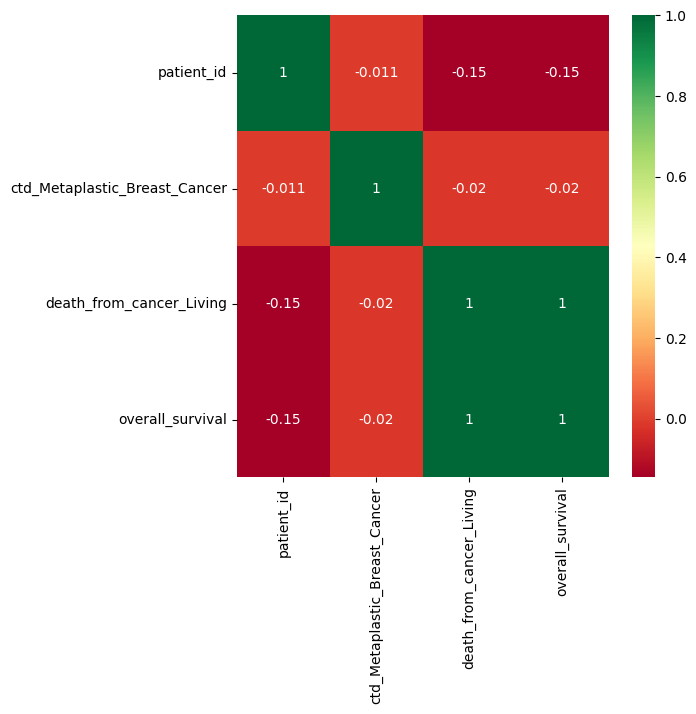

In [32]:
#comparando variables independientes
plt.figure(figsize = (6,6))
sns.heatmap(analisis2.corr(), annot = True, cmap = "RdYlGn")

In [33]:
from sklearn import preprocessing #escalando datos analisis2

d = preprocessing.MinMaxScaler(feature_range = (0,1))

col = analisis2.columns
res = d.fit_transform(analisis2)

scaled_df = pd.DataFrame(res, columns=col)
scaled_df.head()

,patient_id,ctd_Metaplastic_Breast_Cancer,death_from_cancer_Living,overall_survival
0,0.000000,0.0,1.0,1.0
1,0.000274,0.0,1.0,1.0
2,0.000685,0.0,0.0,0.0
3,0.000822,0.0,1.0,1.0
4,0.001096,0.0,0.0,0.0


In [34]:
a=scaled_df["lymph_nodes_examined_positive"]  
b=scaled_df["lymph_nodes_examined_positive"]  
c=scaled_df["nottingham_prognostic_index"]   
#d=scaled_df["'overall_survival"] 
e=scaled_df["type_of_breast_surgery_BREAST_CONSERVING"] 
f=scaled_df["type_of_breast_surgery_MASTECTOMY"] 
g=scaled_df["Breast_Invasive_Ductal_Carcinoma"] 
h=scaled_df["Breast_Mixed_Ductal_and_Lobular_Carcinoma"] 
i=scaled_df["Metaplastic_Breast_Cancer"] 
j=scaled_df["cellularity_High"]      
k=scaled_df["cellularity_Low"]                                                   
l=scaled_df["cellularity_Moderate"  ]                                            
m=scaled_df["death_from_cancer_Died_of_Disease"]                                
n=scaled_df["death_from_cancer_Died_of_Other_Causes"  ]                          
o=scaled_df["death_from_cancer_Living" ]
data = pd.DataFrame({"1":a, "2": b, "3":c, "4": d,"5":e, "6": f, "7":g, "8": h, "9": i, "11": k, "12": l, "13": m, "14": n, "15": o})

# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')

# Display the plot
plt.show()

KeyError: 'lymph_nodes_examined_positive'

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4))
for idx, feature in enumerate(list(analisis.columns)[:3]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis, ax=axes[idx])
plt.show()  

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 4))
for idx1, feature in enumerate(list(analisis.columns)[4:9]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis, ax=axes[idx1])
plt.show() 

In [ ]:
sns.pairplot(analisis, hue='overall_survival', size=4)
plt.show()


> <h1> Cosas por hacer </h1>
>
> <h2> Limpieza de datos </h2>
>
> - Proponer la ecuación lineal
> - Normalizar la base de datos
> - Calcular parámetros estadísticos
>
> <h2> Prueba de hipótesis </h2>
>
> - Plantear hipótesis nula y alternativa
> - Graficar distribución
> - Plantear un modelo que se ajuste a la distribución
> - Aceptar o rechazar hipótesis nula
>
> <h2> Prueba ANOVA </h2>
>
> -